<a href="https://colab.research.google.com/github/isaacmsl/mnist-classifiers-california-housing-regressors/blob/main/california_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
from sklearn.datasets import fetch_california_housing

X, y = fetch_california_housing(return_X_y=True, as_frame=True)

In [44]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


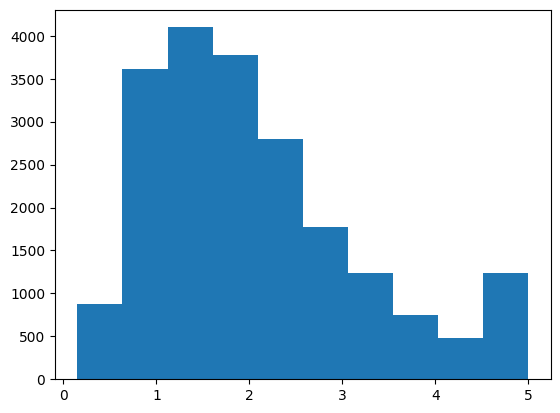

In [109]:
# plot y
import matplotlib.pyplot as plt

plt.hist(y)
plt.show()

In [45]:
from sklearn.preprocessing import StandardScaler

def normalize_data(X_train, X_test):
    scaler = StandardScaler()
    scaler.fit(X_train)
    return scaler.transform(X_train), scaler.transform(X_test)

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_norm, X_test_norm = normalize_data(X_train, X_test)

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

def fit_grid_search_cv(classifier, param_grid, X_train, y_train, grid_search_n_jobs=-1):
    grid_search = GridSearchCV(
        classifier,
        param_grid,
        cv=3,
        scoring='neg_mean_squared_error',
        n_jobs=grid_search_n_jobs,
        verbose=2
    )
    grid_search.fit(X_train, y_train)
    return grid_search

# DecisionTreeRegressor Training

In [97]:
from sklearn.tree import DecisionTreeRegressor

param_grid = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42]
}

grid_search_cv_dtr = fit_grid_search_cv(DecisionTreeRegressor(), param_grid, X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


# SVR Training

In [105]:
from sklearn.svm import SVR

param_grid = {
    "C": [0.1, 1, 10, 100],
    "epsilon": [0.1, 1, 10, 100],
    "kernel": ["linear", "rbf"],
    "max_iter": [50, 100, 500]
}

grid_search_cv_svr = fit_grid_search_cv(SVR(), param_grid, X_train_norm, y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


# LinearRegression Training

In [84]:
# linear regression
from sklearn.linear_model import LinearRegression

param_grid = {
    "fit_intercept": [True, False],
    "positive": [True, False],
    "copy_X": [True, False],
    "n_jobs": [-1]
}

grid_search_cv_lr = fit_grid_search_cv(LinearRegression(), param_grid, X_train_norm, y_train, grid_search_n_jobs=2)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


# Results

In [106]:
print("DecisionTreeRegressor")
print(grid_search_cv_dtr.best_params_)
print("MSE (best score):", grid_search_cv_dtr.best_score_)

print("SVR")
print(grid_search_cv_svr.best_params_)
print("MSE (best score):", grid_search_cv_svr.best_score_)

print("LinearRegression")
print(grid_search_cv_lr.best_params_)
print("MSE (best score):", grid_search_cv_lr.best_score_)


DecisionTreeRegressor
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'random_state': 42}
MSE (best score): -0.41521499850419036
SVR
{'C': 1, 'epsilon': 1, 'kernel': 'rbf', 'max_iter': 500}
MSE (best score): -0.4593034767122073
LinearRegression
{'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': False}
MSE (best score): -0.5199058283738824


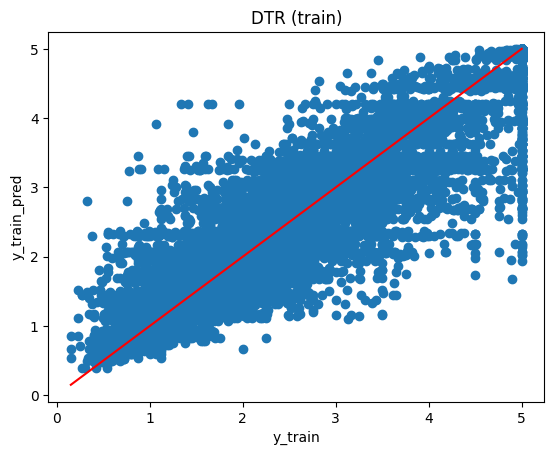

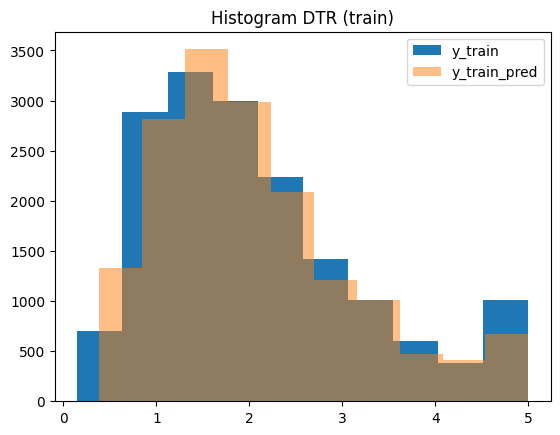

In [148]:
import matplotlib.pyplot as plt

regressor = grid_search_cv_dtr.best_estimator_

y_train_pred = regressor.predict(X_train)

plt.title("DTR (train)")
plt.scatter(y_train, y_train_pred)
plt.xlabel("y_train")
plt.ylabel("y_train_pred")
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color="red")
plt.show()

plt.title("Histogram DTR (train)")
plt.hist(y_train, label="y_train")
plt.hist(y_train_pred, label="y_train_pred", alpha=0.5)
plt.legend()
plt.show()

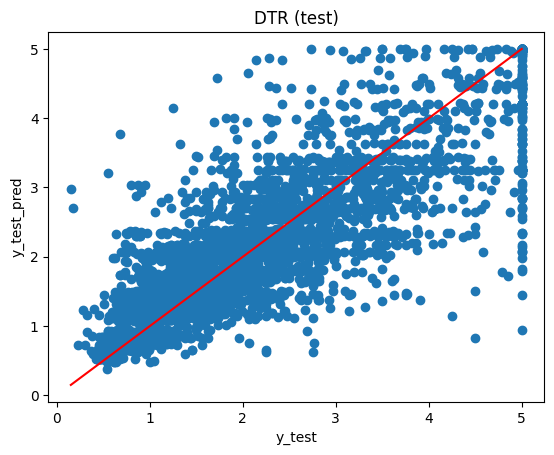

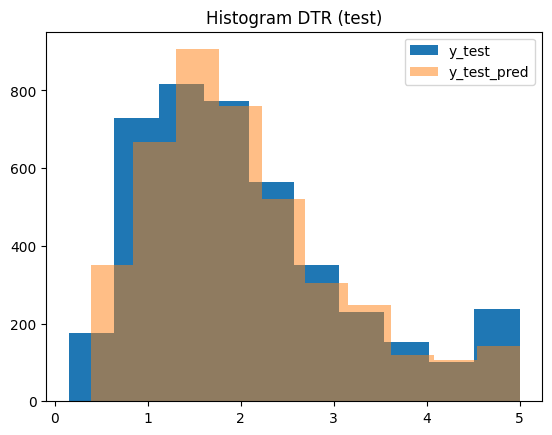

In [150]:
import matplotlib.pyplot as plt

regressor = grid_search_cv_dtr.best_estimator_

y_test_pred = regressor.predict(X_test)

plt.title("DTR (test)")
plt.scatter(y_test, y_test_pred)
plt.xlabel("y_test")
plt.ylabel("y_test_pred")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red")
plt.show()

plt.title("Histogram DTR (test)")
plt.hist(y_test, label="y_test")
plt.hist(y_test_pred, label="y_test_pred", alpha=0.5)
plt.legend()
plt.show()

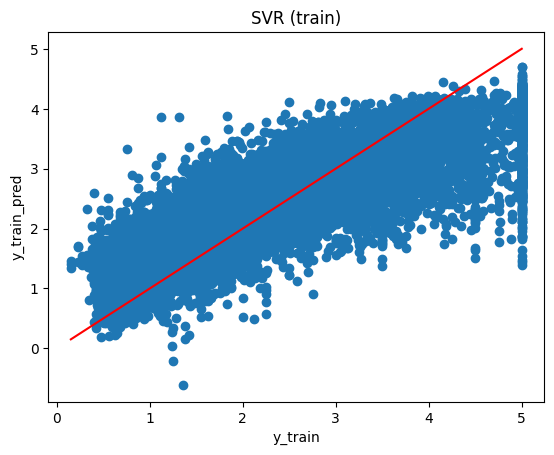

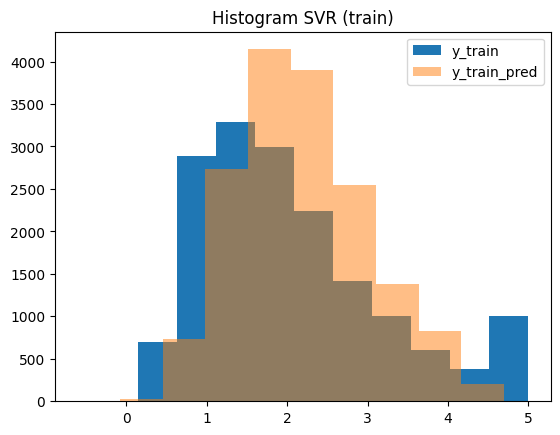

In [153]:
import matplotlib.pyplot as plt

regressor = grid_search_cv_svr.best_estimator_

y_train_pred = regressor.predict(X_train_norm)

plt.title("SVR (train)")
plt.scatter(y_train, y_train_pred)
plt.xlabel("y_train")
plt.ylabel("y_train_pred")
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color="red")
plt.show()

plt.title("Histogram SVR (train)")
plt.hist(y_train, label="y_train")
plt.hist(y_train_pred, label="y_train_pred", alpha=0.5)
plt.legend()
plt.show()

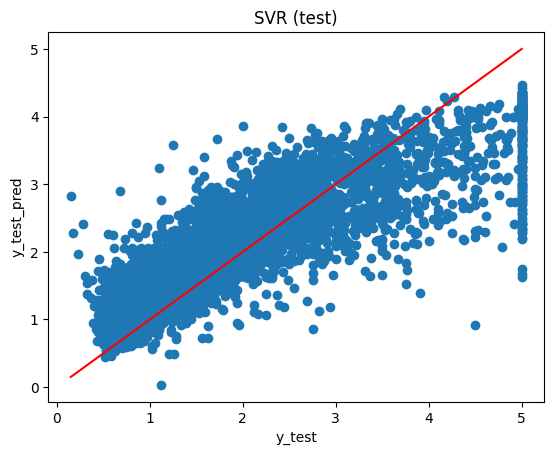

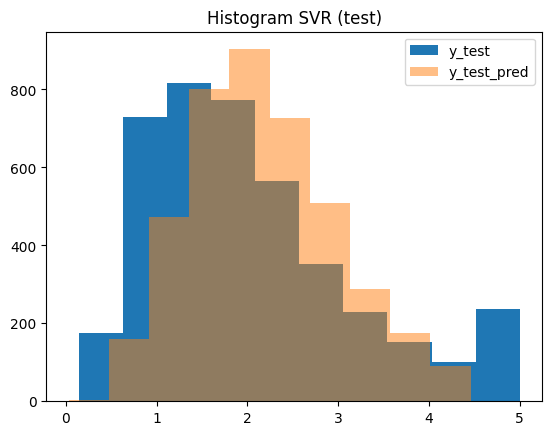

In [152]:
import matplotlib.pyplot as plt

regressor = grid_search_cv_svr.best_estimator_

y_test_pred = regressor.predict(X_test_norm)

plt.title("SVR (test)")
plt.scatter(y_test, y_test_pred)
plt.xlabel("y_test")
plt.ylabel("y_test_pred")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red")
plt.show()

plt.title("Histogram SVR (test)")
plt.hist(y_test, label="y_test")
plt.hist(y_test_pred, label="y_test_pred", alpha=0.5)
plt.legend()
plt.show()

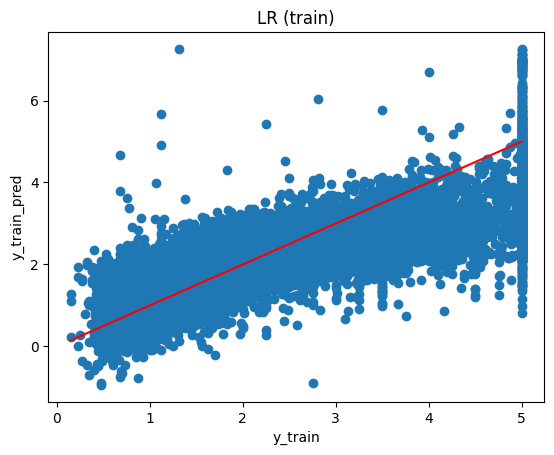

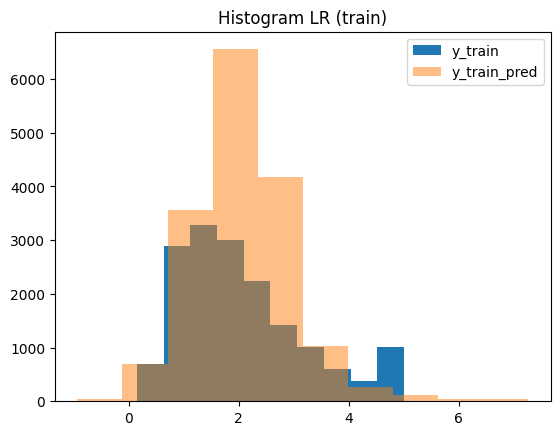

In [154]:
import matplotlib.pyplot as plt

regressor = grid_search_cv_lr.best_estimator_

y_train_pred = regressor.predict(X_train_norm)

plt.title("LR (train)")
plt.scatter(y_train, y_train_pred)
plt.xlabel("y_train")
plt.ylabel("y_train_pred")
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color="red")
plt.show()

plt.title("Histogram LR (train)")
plt.hist(y_train, label="y_train")
plt.hist(y_train_pred, label="y_train_pred", alpha=0.5)
plt.legend()
plt.show()

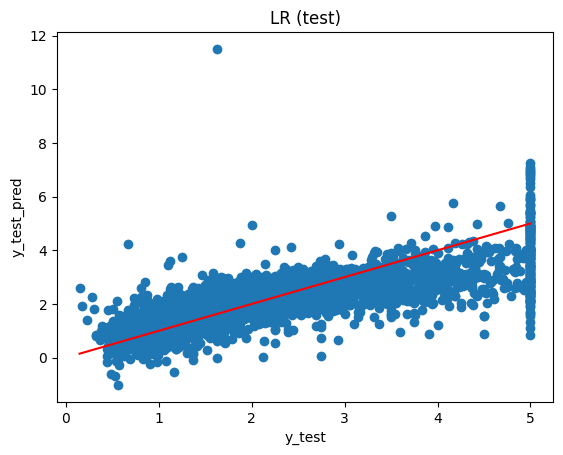

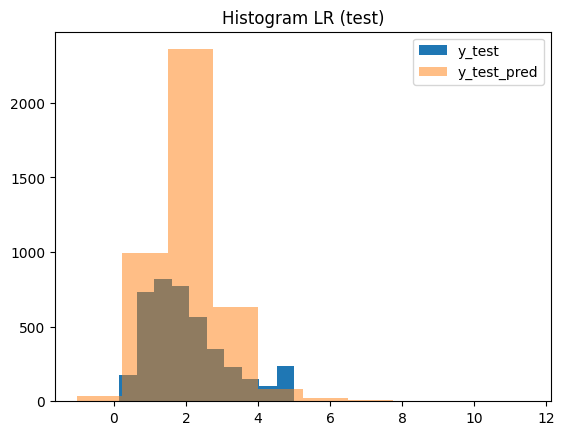

In [155]:
import matplotlib.pyplot as plt

regressor = grid_search_cv_lr.best_estimator_

y_test_pred = regressor.predict(X_test_norm)

plt.title("LR (test)")
plt.scatter(y_test, y_test_pred)
plt.xlabel("y_test")
plt.ylabel("y_test_pred")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red")
plt.show()

plt.title("Histogram LR (test)")
plt.hist(y_test, label="y_test")
plt.hist(y_test_pred, label="y_test_pred", alpha=0.5)
plt.legend()
plt.show()